In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv("Data_Science_Internship - Dump.csv")

In [3]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.shape

(46608, 16)

In [5]:
df.nunique()

Unnamed: 0        46608
Agent_id            120
status                6
lost_reason          30
budget             1857
lease               311
movein              477
source              682
source_city        4335
source_country      185
utm_source           34
utm_medium           63
des_city            219
des_country          14
room_type             5
lead_id           30574
dtype: int64

In [6]:
df['status'].unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

In [7]:
df = df.fillna(0)

In [8]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,0,0,0,0,0,0,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,0,0,0,0,0,0,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,0,0,0,0,0,0,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,0,0,0,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [9]:
df = df.astype(str)

In [10]:
df['source_city'] = LabelEncoder().fit_transform(df['source_city'])
df['source'] = LabelEncoder().fit_transform(df['source'])
df['lead_id'] = LabelEncoder().fit_transform(df['lead_id'])
df['Agent_id'] = LabelEncoder().fit_transform(df['Agent_id'])
df['lost_reason'] = LabelEncoder().fit_transform(df['lost_reason'])
df['source_country'] = LabelEncoder().fit_transform(df['source_country'])
df['utm_source'] = LabelEncoder().fit_transform(df['utm_source'])
df['utm_medium'] = LabelEncoder().fit_transform(df['utm_medium'])
df['des_city'] = LabelEncoder().fit_transform(df['des_city'])
df['des_country'] = LabelEncoder().fit_transform(df['des_country'])
df['status'] = LabelEncoder().fit_transform(df['status'])
df['budget'] = LabelEncoder().fit_transform(df['budget'])
df['lease'] = LabelEncoder().fit_transform(df['lease'])
df['movein'] = LabelEncoder().fit_transform(df['movein'])
df['room_type'] = LabelEncoder().fit_transform(df['room_type'])

C:\Users\visha\AppData\Local\Temp\ipykernel_26836\3643571687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


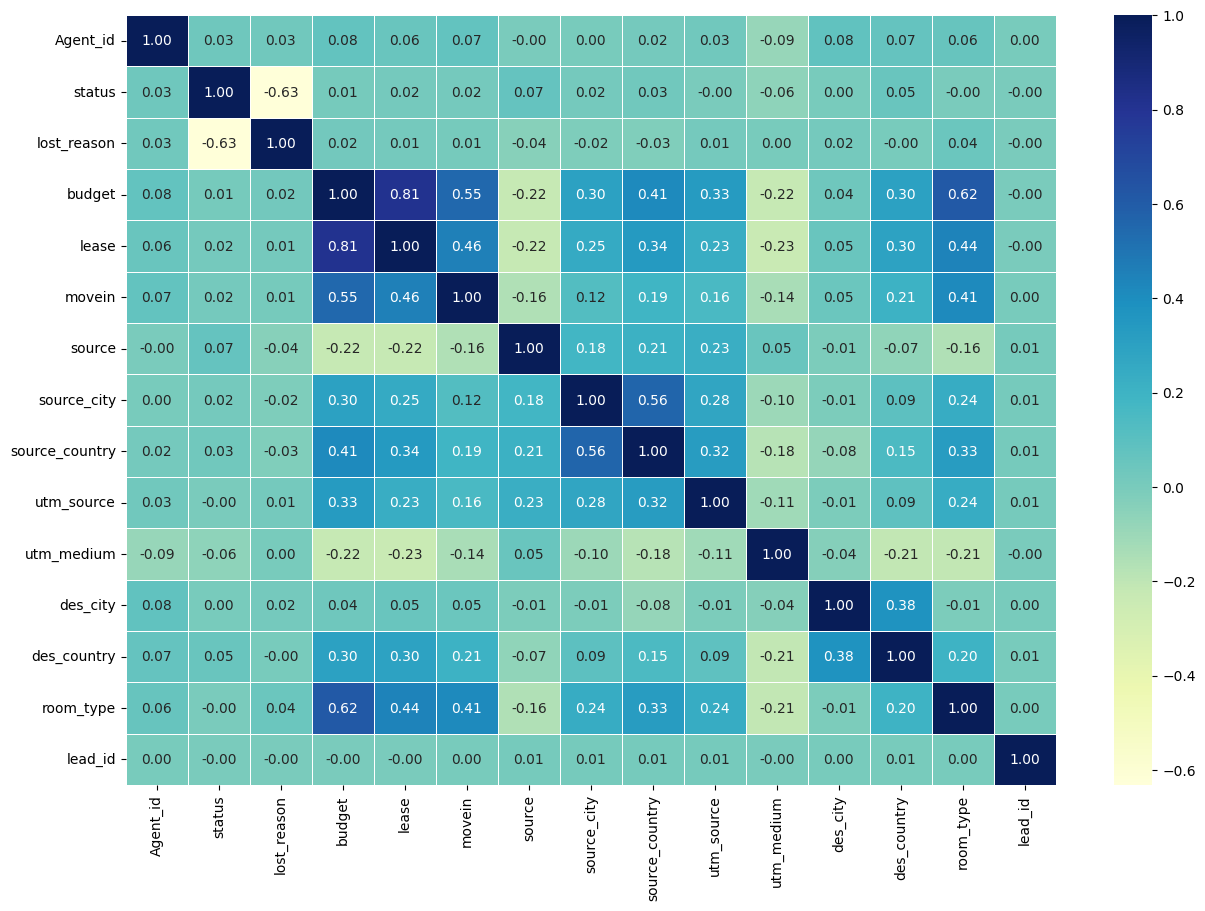

In [11]:
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");# for decimal places

In [12]:
df['status'].unique()

array([2, 5, 3, 0, 4, 1])

In [13]:
index_names = df[ df['status'] == 3].index
df.drop(index_names, inplace = True)

In [14]:
index_names = df[ df['status'] == 0].index
df.drop(index_names, inplace = True)

In [15]:
index_names = df[ df['status'] == 4].index
df.drop(index_names, inplace = True)

In [16]:
index_names = df[ df['status'] == 1].index
df.drop(index_names, inplace = True)

In [17]:
df['status'].unique()

array([2, 5])

In [18]:
df['status'] = df['status'].replace({2:0 , 5:1})

In [19]:
df['status'].unique()

array([0, 1])

In [20]:
df.shape

(46317, 16)

In [21]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,12,0,22,0,2,0,0,0,0,6,11,206,9,0,24487
1,1,20,0,17,0,2,0,0,0,0,6,11,75,9,0,22098
2,2,87,0,22,1759,266,472,344,2630,167,26,4,19,9,1,17972
3,3,110,0,17,11,2,0,508,2830,167,26,4,27,9,0,3592
4,4,12,0,9,0,2,0,0,0,0,6,11,0,0,0,30099


In [23]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# # Convert to categorical data by converting data to integers
# X_cat  = X.astype(int)
# # Three features with highest chi -squared statistics are selected
# chi2_features = SelectKBest(chi2, k=9 )
# X_kbest_features  = chi2_features.fit_transform(X_cat, Y)
# # Reduced features
# print( 'Original feature number:',X_cat.shape[1])
# print( ' Reduced feature number:',X_kbest_features.shape[1])

In [24]:
# ans = pd.DataFrame(X_kbest_features)
# ans.head()

In [25]:
df = df.drop(columns = ['Unnamed: 0'] , axis = 1)

In [26]:
lost = df[df.status == 0]
won = df[df.status == 1]

In [27]:
print(lost.shape)
print(won.shape)

(43244, 15)
(3073, 15)


In [28]:
res = won
for i in range(13):
    res = pd.concat([res,won], axis=0)
print(res.shape)

(43022, 15)


In [29]:
ndf = pd.concat([lost, res])

In [30]:
ndf.shape

(86266, 15)

In [31]:
ndf.status.value_counts()

0    43244
1    43022
Name: status, dtype: int64

In [32]:
Y = ndf['status']
X = ndf.drop(columns = ['status'] , axis = 1)

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Convert to categorical data by converting data to integers
X_cat  = X.astype(int)
# Three features with highest chi -squared statistics are selected
chi2_features = SelectKBest(chi2, k=9 )
X_kbest_features  = chi2_features.fit_transform(X_cat, Y)
# Reduced features
print( 'Original feature number:',X_cat.shape[1])
print( ' Reduced feature number:',X_kbest_features.shape[1])

Original feature number: 14
 Reduced feature number: 9


In [34]:
ans = pd.DataFrame(X_kbest_features)
ans.head()

,0,1,2,3,4,5,6,7,8
0,12,22,0,0,0,0,0,11,24487
1,20,17,0,0,0,0,0,11,22098
2,87,22,1759,472,344,2630,167,4,17972
3,110,17,11,0,508,2830,167,4,3592
4,12,9,0,0,0,0,0,11,30099


In [37]:
X = ndf.drop(columns = ["lease",'utm_source','des_city','des_country',"room_type"], axis =1)

In [38]:
X.shape

(86266, 10)

In [39]:
Y.shape

(86266,)

In [41]:
X_train, X_test, y_train, y_test = tts(X,Y,test_size = 0.25 ,random_state = 3 ,stratify=Y)

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9725970232299346


C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64699, 10)
(64699,)
(21567, 10)
(21567,)


In [44]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:",f1)

Precision: 0.9727460987761746
Recall: 0.972621085420518
F1-score: 0.9725956976015564


In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    We are plotting confusion matrix using seaborn's heatmap
    """
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label(tested one)")
    plt.ylabel("Predicted label")
    
    # we dont need but if our font text is little up or down we can fix this by this
    
#     bottom,top=ax.get_ylim()
#     ax

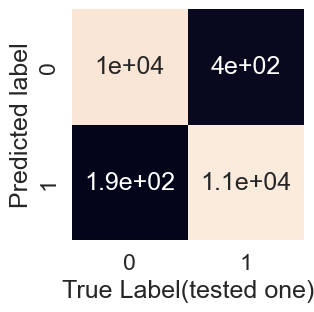

In [46]:
plot_conf_mat(y_test=y_test,y_pred=y_pred)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10811
           1       0.96      0.98      0.97     10756

    accuracy                           0.97     21567
   macro avg       0.97      0.97      0.97     21567
weighted avg       0.97      0.97      0.97     21567

